<a href="https://colab.research.google.com/github/vk26kumar/OIBSIP/blob/main/EMAIL_SPAM_DETECTION_WITH_MACHINE_LEARNING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAME-Vishal Kumar

DATA SCIENCE PROJECT


TASK 4-EMAIL SPAM DETECTION WITH MACHINE LEARNING

DETAILS-We’ve all been the recipient of spam emails before. Spam mail, or junk mail, is a type of email that is sent to a massive number of users at one time, frequently containing cryptic messages,scams,or most dangerously, phishing content.
In this Project, use Python to build an email spam detector. Then, use machine learning to train the spam detector to recognize and classify emails into spam and non-spam.Let’s get started !

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import warnings

In [ ]:
warnings.filterwarnings("ignore")


In [ ]:
data = pd.read_csv("/content/spam.csv", encoding='latin-1')
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
data.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
data.isnull().sum()

,0
v1,0
v2,0
Unnamed: 2,5522
Unnamed: 3,5560
Unnamed: 4,5566


In [ ]:
data.isnull().mean()*100

,0
v1,0.000000
v2,0.000000
Unnamed: 2,99.102656
Unnamed: 3,99.784637
Unnamed: 4,99.892319


In [ ]:
data['text length'] = data['v2'].apply(len)
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,text length
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,111
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,155
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,61
...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN,161
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN,37
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN,57
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN,125


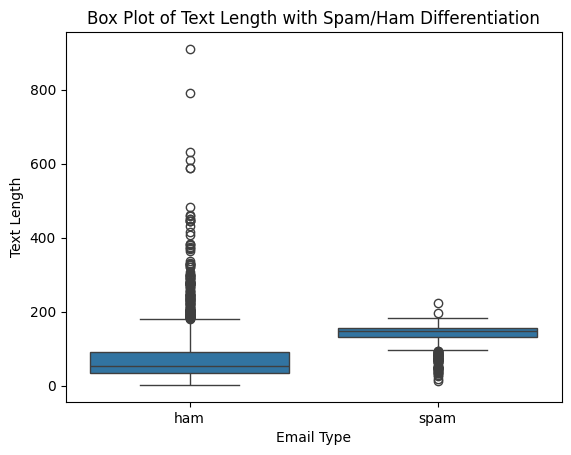

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

!pip install pandas
import pandas as pd

data = pd.read_csv('/content/spam.csv', encoding='latin-1')
data['text length'] = data['v2'].apply(len)
sns.boxplot(x='v1', y='text length', data=data)
plt.xlabel('Email Type')
plt.ylabel('Text Length')
plt.title('Box Plot of Text Length with Spam/Ham Differentiation')
plt.show()

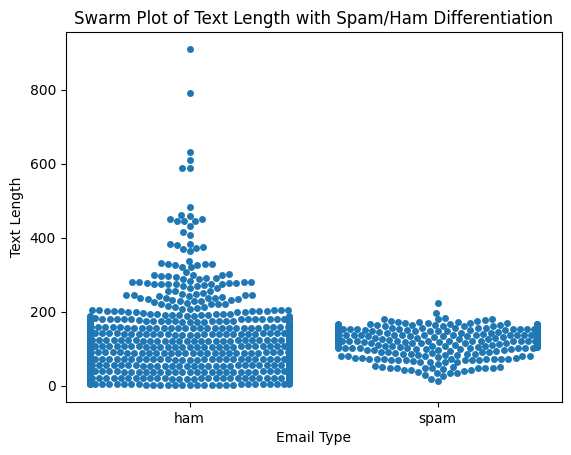

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

!pip install pandas
import pandas as pd

data = pd.read_csv('/content/spam.csv', encoding='latin-1')
data['text length'] = data['v2'].apply(len)
sns.swarmplot(x='v1', y='text length', data=data)
plt.xlabel('Email Type')
plt.ylabel('Text Length')
plt.title('Swarm Plot of Text Length with Spam/Ham Differentiation')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
# Dividing the whole dataset into training & testing set for model training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data['v2'], data['v1'], test_size=0.2, random_state=42)

In [ ]:
#Text preprocessing and feature extraction

vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [ ]:
# Building a Naive Bayes classifier

classifier = MultinomialNB()
classifier.fit(X_train_vectorized, y_train)

MultinomialNB()

In [ ]:
 #Make predictions on the test set

y_pred = classifier.predict(X_test_vectorized)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [ ]:
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.9838565022421525
Confusion Matrix:
[[963   2]
 [ 16 134]]
Classification Report:
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       0.99      0.89      0.94       150

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



WE CAN DETECT SPAM EMAIL WITH ACCURACY OF 98 PERCENT.